In [1]:
# Code to generate a sigmoid graph showing how the signoid function logic can be used for binary classification

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    y = []
    for val in x:
        y.append(1/(1+np.exp(-val)))
    return y                  # Y axis values are calculated and using sigmoid function and retured in an array

import matplotlib.pyplot as plt
import numpy as np

# x = np.arange(-10., 10., 0.1)  # Values of X axis between -10 and 10 at intervals of 0.1
# y = sigmoid(x)
# plt.plot(x,y)                  # Generate graph using matplotlib.pyplot
# plt.show()

In [2]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns

In [3]:
# Import data from CSV file
data = pd.read_excel('churn_clean_lr_V2.xlsx')

In [4]:
# Function to clean column names

def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df

In [5]:
# Check for null values
data.isna().any(axis=0).any()

False

In [6]:
# pd.plotting.scatter_matrix(data[['DISTINCT_TITLES','MonthlyCharge','MINS_WATCHED','Income','DEVICE_COUNT',
#            'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']], figsize=(20, 20))
# plt.show()

In [7]:
# # Declaring all the columns which will be used for creation of box plots

# to_plot = ['DISTINCT_TITLES','MonthlyCharge','MINS_WATCHED','Income','DEVICE_COUNT',
#            'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']

# # Creating box plots, with mean and median printed
# sns.set(style="whitegrid")
# fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (8,7*len(to_plot)))
# i = 0
# for x in to_plot:
#     g = sns.boxplot(x='CHURN',y=x,data=data, ax=axes[i])
#     g.set_xlabel(x,fontsize=15)
#     g.set_ylabel("Count",fontsize=15)
#     i += 1
#     means = data.groupby('CHURN')[x].mean()
#     medians = data.groupby('CHURN')[x].median()
#     vertical_offset = data[x].mean() *.05
#     for xtick in g.get_xticks():
#         g.text(xtick,medians[xtick]-vertical_offset,"Mean:"+str(round(means[xtick],2))+'\n'+"Median:"+str(round(medians[xtick],2)), horizontalalignment='center', color='w', weight='semibold')


# plt.show(fig)

Observations from charts of numerical continuous data
Looking at box plots above, we can conclude:

MINS_WATCHED, Monthly Charge and DISTINCT_TITLES seems to impact the churn significantly more than other variables.
Customers with low DISTINCT_TITLES value, high Monthly payment and low MINS_WATCHED per year consumption churn and discontinue service, more than their couterparts
Charting Categorical Variables
We have many catergorical variables. To analyze the churn w.r.t. to categorical variables, we will use bar charts. The chart will show percentage of customer churning out and continuing with the service in each of the categories, like how much percentage of customer discontinued/continued w.r.t. if the customer uses a tablet or not.

Let's start with plotting all the categorical variables.

In [8]:
# # Declaring all the columns which will be used for creation of box plots

# to_plot = ['GENDER','BILLING_PLATFORM','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','BY_CAMPAIGN',
#            'Tablet','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING','PRODUCT_SWITCH','IS_RECONNECT_PAID_TO_PAID','IS_RECONNECT_PAID_TO_TRIAL',
#            'IS_RECONNECT_TRIAL_TO_PAID','IS_RECONNECT_TRIAL_TO_TRIAL','STREAM_SPORTS','STREAM_SERIES',
#            'STREAM_MOVIES','PAYMENT_METHOD','PURCHASE_DEVICE_TYPE']

# # Creating bar charts, with percentages printed
# sns.set(style="whitegrid", color_codes=True)
# fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (15,5*len(to_plot)))
# i = 0
# for x in to_plot:
#     d = data.groupby(x)['CHURN'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
#     g = sns.barplot(x=x,y='Percentage',hue='CHURN', data=d, ax=axes[i])     # Create bar chart
#     g.set_ylim(0,100)
#     g.set_xlabel(x,fontsize=15)
#     g.set_ylabel("Percent",fontsize=15)
#     i += 1
#     for p in g.patches:
#         txt = str(p.get_height().round(2)) + '%'
#         txt_x = p.get_x() + p.get_width()/2
#         txt_y = p.get_height()
#         g.text(txt_x,txt_y+1,txt)        # Printing percentages on the bars


# plt.show(fig)


Observations from charts of categorical variables
Looking at bar charts above, we can conclude:

Customer who STREAM_SPORTS and STREAM_SERIES have higher churn
Customers who HAS_FREE_TRIAL, who are on month to month contract, who don't have HAS_ANY_KIDS_PROFILE_STREAMING, who have DSL internet and have multiple lines are more likely to churn
Customers which pay by electronic check are more likely to churn compared to other methods
GENDER, BILLING_PLATFORM, IS_RECONNECT_PAID_TO_PAID, IS_RECONNECT_PAID_TO_TRIAL, STREAM_MOVIES, IS_RECONNECT_TRIAL_TO_TRIAL,BY_CAMPAIGN, Tablet, PURCHASE_DEVICE_TYPE and IS_RECONNECT_TRIAL_TO_PAID seem to have low impact on the churn rate.
Different states seems to have different churn rates
Next we proceed to the creation of Logistic Regression model

First step is to create dummy variables for the categorical data. We will use pandas get_dummies function. After creating dummy variables, we will have to normalize various column values to bring them within similar ranges. For that we will use StandardScalar from sklearn.preprocessing. With values standardized, we will split the data into training and test sets.

In [9]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = to_plot = ['GENDER','BILLING_PLATFORM','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','BY_CAMPAIGN',
                                    'Tablet','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING','PRODUCT_SWITCH','IS_RECONNECT_PAID_TO_PAID','IS_RECONNECT_PAID_TO_TRIAL',
                                    'IS_RECONNECT_TRIAL_TO_PAID','IS_RECONNECT_TRIAL_TO_TRIAL','STREAM_SPORTS','STREAM_SERIES',
                                    'STREAM_MOVIES','PAYMENT_METHOD','PURCHASE_DEVICE_TYPE', 'CHURN']


# Following columns have continuous numerical data, which needs to be scaled before predictive model can be created.
# Hence, these columns will be transformed to normalized form.

to_transform = ['DISTINCT_TITLES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED','Income','DEVICE_COUNT',
                'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']

dummy_data_file_index = 0

In [10]:
from sklearn.preprocessing import StandardScaler

def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['CHURN_Yes']
    dummy_data.drop(columns=['CHURN_Yes'], inplace=True)
    sc = StandardScaler()
    dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:,to_transform])
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variable_columns, data)

In [11]:
# Starting with imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

In [13]:
# Creating a function to create prediction model based on statsmodel library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set

def get_sm_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    logit_model=sm.Logit(y_train,X_train)
    model=logit_model.fit()
    print(model.summary())
    y_hat = list(map(round, model.predict(X_test)))
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('Confusion Matrix \n',confusion_matrix(y_test, y_hat))
    print('Accuracy Score: ',accuracy_score(y_test, y_hat))
    return model, arr

# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set

def get_sk_model(y_train,X_train, X_test):
    model = LogisticRegression(max_iter=100000000)
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_[0]]
    intercept = model.intercept_[0]
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('Confusion Matrix from sklearn\n',confusion_matrix(y_test, y_pred))
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()
    print('Accuracy Scores from sklearn:\n',accuracy_score(y_test, y_pred))
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    return model, arr, intercept


# Function to create AUC chart and print AUC score.
# AUC score closer to 1 is considered a good model
# Auc score of 0.5 represents are model which is no
# better than a random guess with 50% chance of predicting the right outcome

from sklearn.metrics import roc_curve
def roc(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))

c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ciafa001\AppData\Local\Temp\12\ipykernel_9900\2153310723.py:34: Matpl

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CHURN_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6964
Method:                           MLE   Df Model:                           35
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                     inf
Time:                        16:54:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9394      0.974   

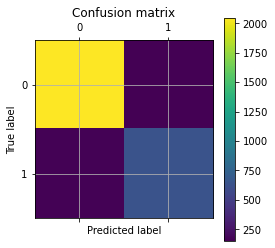

Accuracy Scores from sklearn:
 0.8953333333333333
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2201
           1       0.81      0.80      0.80       799

    accuracy                           0.90      3000
   macro avg       0.87      0.86      0.87      3000
weighted avg       0.90      0.90      0.90      3000



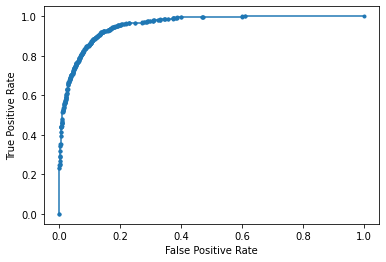

AUC: 0.956


In [14]:
# Run statsmodel function
get_sm_model(y_train,X_train, X_test);
# Run sklearn model
model, arr, intercept = get_sk_model(y_train,X_train, X_test);
# Run AUC
roc(model, X_test, y_test);

Analysis of statsmodels summary and variable significance
Printed above are the details from predictive models created using statsmodels and sklearn. In the model summary generated by statsmodels, we can see the p-value of various variables and determine which variables are significant for predictive modeling. This will help determine list of variables which can be safely removed without any impact on the overall accuracy and confusion matrix.

As can be seen, with the current initial full variable set model, we have an overall prediction accuracy rate of 89%. Confusion matrixs shows that 92.7% (Specificity) service continuations and 79.1% (Sensitivity) service discontinuations can be accurately predicted.

To arrive at the reduced model, we can remove the variables which have higher p-values and use only those variables which have lower p-values. Generally, 0.25 threshold can be used for p-value comparison ( Reference : https://personal.utdallas.edu/~pkc022000/6390/SP06/NOTES/Logistic_Regression_4.pdf ). This gives us a list of independent variables to be used in reduced model.

Reduced Model
Reduced model will have following independent variables. Other variables have been removed based on their low significance and p-values.

'CHURN','DISTINCT_TITLES','NUMB_OF_PROFILES','MonthlyCharge','MINS_WATCHED', 'BILLING_PLATFORM', 'GENDER','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','AGE_IN_MONTHS','CHILDREN', 'BY_CAMPAIGN','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING', 'STREAM_SERIES','STREAM_MOVIES','PAYMENT_METHOD'

Based on the chart analysis, we can conclude that:

MINS_WATCHED, Monthly Charge and DISTINCT_TITLES seems to impact the churn significantly. This in line with the observation on p-values.
STREAM_SPORTS and STREAM_SERIES customer have higher churn rate. This in line with the observation on p-values.
HAS_FREE_TRIAL, NUMB_OF_PROFILES, HAS_ANY_KIDS_PROFILE_STREAMING, SUBSCRIPTION_TYPE, PAYMENT_METHOD and PRODUCT_SWITCH are more likely to discontinue service. This in line with the observation on p-values.
Different states have different churn rates and many dummy variables have significant p-value to continue in the model
Remaining columns have less impact on the churn.
With the knowledge about significant variables, we arrived at reduced data set and removed less significant variables. With this step complete, we will create dummy variables, split test and training set and run the statsmodel based model to check the summary, accuracy scope and confusion matrix.

Let's run and analyze our reduced model now.

c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ciafa001\AppData\Local\Temp\12\ipykernel_9900\2153310723.py:34: Matpl

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CHURN_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6977
Method:                           MLE   Df Model:                           22
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                     inf
Time:                        16:54:58   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.5057      0.258   

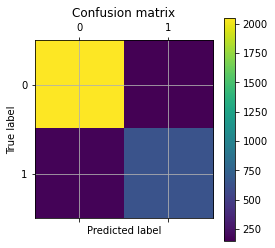

Accuracy Scores from sklearn:
 0.8953333333333333
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2201
           1       0.81      0.79      0.80       799

    accuracy                           0.90      3000
   macro avg       0.87      0.86      0.87      3000
weighted avg       0.89      0.90      0.89      3000



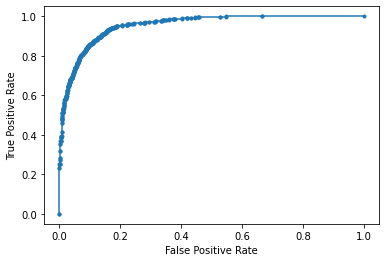

AUC: 0.954


In [15]:
data_reduced = data[['CHURN','DISTINCT_TITLES','NUMB_OF_PROFILES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED'
                    ,'BILLING_PLATFORM', 'GENDER','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD'
                    ,'AGE_IN_MONTHS','CHILDREN', 'BY_CAMPAIGN','SUBSCRIPTION_TYPE'
                    ,'HAS_ANY_KIDS_PROFILE_STREAMING', 'STREAM_SERIES','STREAM_MOVIES','PAYMENT_METHOD']]

dummy_variable_columns = ['CHURN','BILLING_PLATFORM','GENDER','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD', 'BY_CAMPAIGN','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING',
                          'STREAM_SERIES','STREAM_MOVIES','PAYMENT_METHOD']

to_transform = ['NUMB_OF_PROFILES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED','DISTINCT_TITLES','AGE_IN_MONTHS','CHILDREN'
               ]

data_diff = [i for i in data.columns.tolist() + data_reduced.columns.tolist() if i not in data.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variable_columns, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test);
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test);
roc(model, X_test, y_test);

AxesSubplot(0.125,0.125;0.775x0.755)


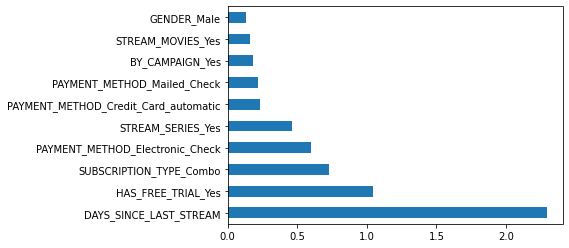

In [16]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=dummy_data_reduced.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='barh'))

In [17]:
data_reduced.columns

Index(['CHURN', 'DISTINCT_TITLES', 'NUMB_OF_PROFILES',
       'DAYS_SINCE_LAST_STREAM', 'MINS_WATCHED', 'BILLING_PLATFORM', 'GENDER',
       'HAS_FREE_TRIAL', 'SUBSCRIPTION_PERIOD', 'AGE_IN_MONTHS', 'CHILDREN',
       'BY_CAMPAIGN', 'SUBSCRIPTION_TYPE', 'HAS_ANY_KIDS_PROFILE_STREAMING',
       'STREAM_SERIES', 'STREAM_MOVIES', 'PAYMENT_METHOD'],
      dtype='object')

PARA MI HASTA ACÁ ESTÁ BIEN. IMPRIMIENDO OBVIO LA ECUACIÓN DE DSP PERO QCYO PASAPALABRA

In [18]:
# Function to calculate the reduction percentage in odds ratio
def impact(coeff, field,x, categorical=False):
    if categorical:
        exp = np.exp(x*coeff)
        print ( field, ': Odds Ratio Reduction : '+str(round((1 - exp)*100,2 ))+'%')
    else:
        exp1 = np.exp(x*coeff/data_reduced['DAYS_SINCE_LAST_STREAM'].std())
        exp2 = np.exp(-1*x*coeff/data_reduced['DAYS_SINCE_LAST_STREAM'].std())
        print ( field, ': Odds Ratio Reduction with unit increase: '+str(round((1 - exp1)*100,2 ))+'%', 'Odds Ratio Reduction with unit decrease: '+str(round((1 - exp2)*100,2 ))+'%')

        
#impact(-3.15,'Tenure',1)
impact(2.29,'DAYS_SINCE_LAST_STREAM  ',1)
impact(2.29,'DAYS_SINCE_LAST_STREAM  ',15)
impact(2.29,'DAYS_SINCE_LAST_STREAM  ',10)
#impact(-0.02,'Age',1)
#impact(-2.2,'InternetService_Fiber_Optic',1,True)
#impact(-0.62,'InternetService_None',1,True)
#impact(-3.24,'SUBSCRIPTION_PERIOD _One_year',1,True)
#impact(-3.33,'SUBSCRIPTION_PERIOD _Two_Year',1,True)
#impact(-0.37,'Phone',1,True)

DAYS_SINCE_LAST_STREAM   : Odds Ratio Reduction with unit increase: -69.39% Odds Ratio Reduction with unit decrease: 40.96%
DAYS_SINCE_LAST_STREAM   : Odds Ratio Reduction with unit increase: -271136.14% Odds Ratio Reduction with unit decrease: 99.96%
DAYS_SINCE_LAST_STREAM   : Odds Ratio Reduction with unit increase: -19349.05% Odds Ratio Reduction with unit decrease: 99.49%


In [19]:
# Code to print the equation (partial, removing all State dummy variables 
# and rounding the coefficient to make it readable)
equation = ''

for a in arr:
    if not a[0].startswith('State'):
        new = str(round(float(a[1].replace("\'","")),2))+' x '+a[0].replace("\'","").replace('_Yes','')
        if new.startswith('-'):
            equation = equation + ' ' + new + ' '
        else:
            equation = equation + ' +' + new + ' '
interceptstr = str(round(intercept,2))

if interceptstr.startswith('-'):
    equation = equation + ' ' + interceptstr
else:
    equation = equation + ' +' + interceptstr

y = 'exp(-1x('+equation+'))'

print ('P (Y=1|X) = 1 / (1 + '+y+')')

P (Y=1|X) = 1 / (1 + exp(-1x( -2.91 x DISTINCT_TITLES  +0.09 x NUMB_OF_PROFILES  +2.29 x DAYS_SINCE_LAST_STREAM  -0.06 x MINS_WATCHED  -0.04 x AGE_IN_MONTHS  +0.01 x CHILDREN  +0.04 x BILLING_PLATFORM_APPLE  +0.06 x BILLING_PLATFORM_DIRECT  -0.09 x BILLING_PLATFORM_GOOGLE  +0.13 x GENDER_Male  +1.04 x HAS_FREE_TRIAL  -3.23 x SUBSCRIPTION_PERIOD_One_year  -3.32 x SUBSCRIPTION_PERIOD_Two_Year  +0.18 x BY_CAMPAIGN  +0.73 x SUBSCRIPTION_TYPE_Combo  -1.51 x SUBSCRIPTION_TYPE_Standalone  -0.38 x HAS_ANY_KIDS_PROFILE_STREAMING  +0.46 x STREAM_SERIES  +0.16 x STREAM_MOVIES  +0.23 x PAYMENT_METHOD_Credit_Card_automatic  +0.6 x PAYMENT_METHOD_Electronic_Check  +0.22 x PAYMENT_METHOD_Mailed_Check  -1.76)))
